In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install mne

In [ ]:
!cp /content/drive/MyDrive/BCICIV_2a.zip /content

In [ ]:
%%capture
!unzip /content/BCICIV_2a.zip -d data

In [ ]:
## analyse the data
import mne

In [ ]:
raw=mne.io.read_raw_gdf('/content/data/A04T.gdf',
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /content/data/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~26 kB, data not loaded>

In [ ]:
raw.annotations

<Annotations | 610 segments: 1023 (26), 1072 (1), 32766 (7), 768 (288), ...>

In [ ]:
events=mne.events_from_annotations(raw)
events[1]


Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '32766': 3,
 '768': 4,
 '769': 5,
 '770': 6,
 '771': 7,
 '772': 8}

{7, 8}

In [ ]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 31513,      0,      5],
       [ 31513,      0,      4],
       [ 57602,      0,      5],
       [ 57602,      0,      2],
       [ 96159,      0,      5],
       [ 96509,      0,      6],
       [ 97009,      0,      7],
       [ 98512,      0,      6],
       [ 99012,      0,      8],
       [100430,      0,      6],
       [100930,      0,      8],
       [102382,      0,      6],
       [102882,      0,      7],
       [104390,      0,      6],
       [104890,      0,      8],
       [106501,      0,      6],
       [107001,      0,      7],
       [108418,      0,      6]])

**From the paper**  
'1023': 1 (Rejected trial),   
 '1072': 2 (Eye movements),  
 '276':  3 (eyes open)),  
 '277':  4 (eyes closed),   
 '32766':5 (Start of a new run),  
 '768':  6 (Start of a trial),  
 '769': 7 (class 1),  
 '770': 8 (class 2),  
 '771': 9 (class 3),  
 '772': 10 (class 4)



In [ ]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,

}

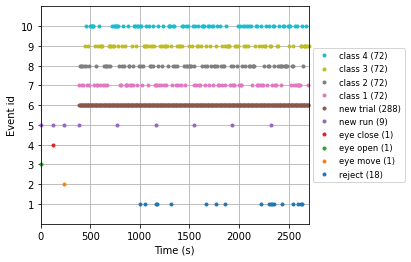

In [ ]:
#https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],tmin= -0.1, tmax=0.7, preload=True)

Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


In [ ]:
epochs.get_data().shape

(288, 22, 201)

In [ ]:
label=epochs.events[:,-1]
len(label)

288

In [ ]:
#epoch vs evoked

In [ ]:
evoked_0 = epochs['7'].average()
evoked_1 = epochs['8'].average()
evoked_2 = epochs['9'].average()
evoked_3 = epochs['10'].average()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


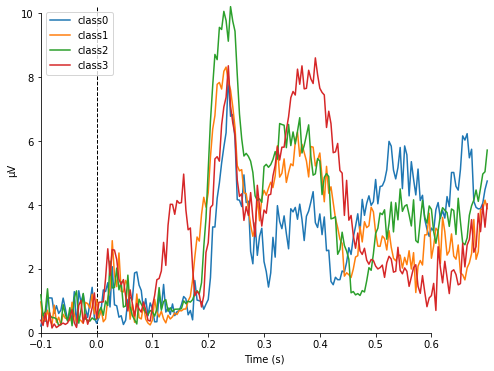

[<Figure size 576x432 with 1 Axes>]

In [ ]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

# let create a function

In [ ]:
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels



In [ ]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'/content/data/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))


In [ ]:
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

((2448, 22, 176), (2448,), (2448,))

In [ ]:
np.isnan(features).sum()


0

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576]))

In [ ]:
unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([288, 288, 288, 144, 288, 288, 288, 288, 288]))